# Project Python Foundations: FoodHub Data Analysis


### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# read the data
df = pd.read_csv('C:/Users/15612/Downloads/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? 

In [4]:
df.shape #shape of the data provides us with the rows and columns in the dataset

(1898, 9)

#### Observations: 
There are 1898 rows and 9 columns present in the data.


### **Question 2:** What are the datatypes of the different columns in the dataset? 

In [5]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: 
There are 5 numerical columns and 4 object type columns. However, the column rating is being read as an object type column when it should be a numerical column since it is a numerical rating. After looking closer to the rating column the reason why it is being read as an object type is because there are ratings that are "Not Given". Since there is string and numbers in this column, the column is being read as an object type column.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.

In [6]:
df.isnull().sum() #isnull().sum() provides us with a sum of the missing values in each column

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
There seems to be no missing values in the data.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [176]:
df.describe().T #the describe() function gives us the statistics of each column

,count,mean,std,min,25%,50%,75%,max
order_id,1898.000000,1477495.500000,548.049724,1476547.000000,1477021.250000,1477495.500000,1477969.750000,1478444.000000
customer_id,1898.000000,171168.478398,113698.139743,1311.000000,77787.750000,128600.000000,270525.000000,405334.000000
cost_of_the_order,1898.000000,16.498851,7.483812,4.470000,12.080000,14.140000,22.297500,35.410000
food_preparation_time,1898.000000,27.371970,4.632481,20.000000,23.000000,27.000000,31.000000,35.000000
delivery_time,1898.000000,24.161749,4.972637,15.000000,20.000000,25.000000,28.000000,33.000000
total_time,1898.000000,51.533720,6.833603,35.000000,47.000000,52.000000,56.000000,68.000000


### Observations: 
The minimum time it takes for food to be prepared once an order is placed is 20 minutes. The average time is 27 minutes and the maximum time is 35 minutes. 


### **Question 5:** How many orders are not rated?

In [8]:
df["rating"].value_counts()[['Not given']].sum() #This code will give the sum of the orders that were rated as 'Not given'

736

#### Observations:
736 orders out of 1898 orders are not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) 

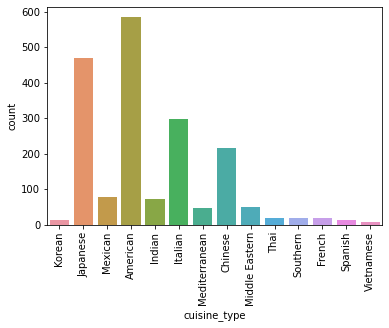

In [9]:
sns.countplot(data=df,x='cuisine_type')
plt.xticks(rotation=90)
plt.show()

#### Observations:
American, Japanese, Italian, and Chinese are the most popular cuisine types among FoodHub customers. 

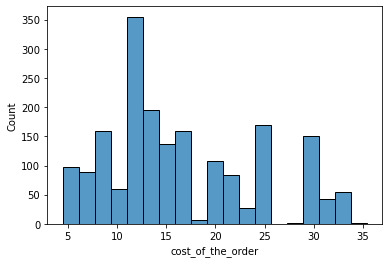

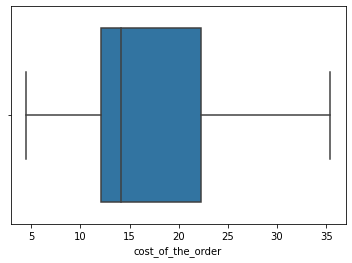

In [10]:
sns.histplot(data=df,x='cost_of_the_order')
plt.show()
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

# Observations: 
The cost of the order column is more right-skewed meaning most of the orders in FoodHub are cheaper and fall in the $10-$20 dollar range. 50% of orders cost less than 15 dollars. 

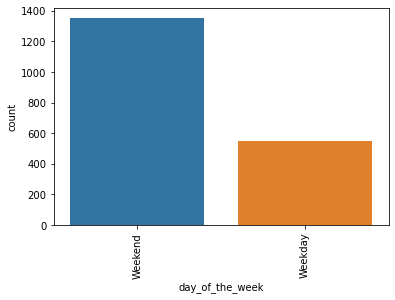

In [11]:
sns.countplot(data=df,x='day_of_the_week')
plt.xticks(rotation=90)
plt.show()

#### Observations: 
Most orders (more than half) are placed on Weekends. FoodHub service is more common on the weekends than on weekdays. Orders on weekends are more than double the amount of orders on the weekdays. 

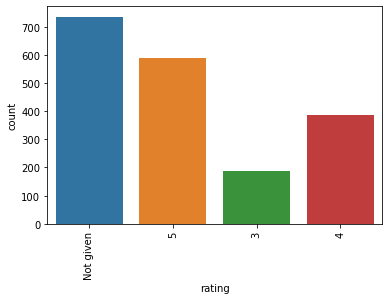

In [12]:
sns.countplot(data=df,x='rating')
plt.xticks(rotation=90)
plt.show()

#### Observations:
A majority of the orders are not given a rating by each customer but in cases where a customer gives a rating higher ratings are given. When a order was rated, most orders were given a rating of 5. There are no ratings that are lower than a 3. 

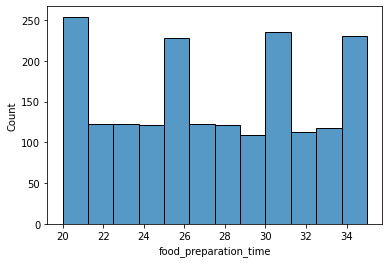

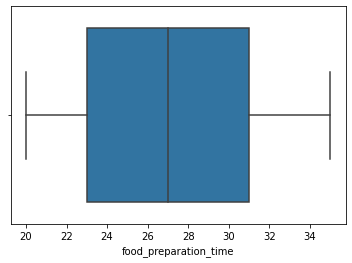

In [13]:
sns.histplot(data=df,x='food_preparation_time')
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

#### Observations:
Food Preparation time is for the most more evenly distributed with a slight right skewdness. 50% of orders took less than 27 minutes for their food to be prepped.

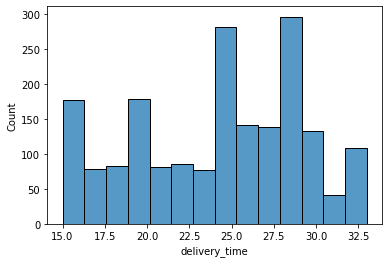

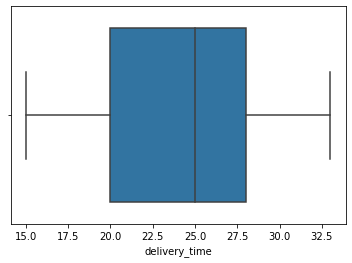

In [14]:
sns.histplot(data=df,x='delivery_time')
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.show()

#### Observations:
The Delivery time is slightly left-skewed. 
50% of orders have delivery times of less than 25 minutes. 

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [15]:
df.groupby('restaurant_name')['order_id'].nunique().sort_values() #By using the group by function the two columns: restaurant_name and order_id are combined. The nunique function allows each order ID to be calculated so that each restauarant will have the total number of orders received. The sort_value function then sorts the numbers from least to greatest so that it is easier to go through. 

restaurant_name
'wichcraft                     1
Lamarca Pasta                  1
Kori Restaurant and Bar        1
Klong                          1
Kambi Ramen House              1
                            ... 
Parm                          68
Blue Ribbon Fried Chicken     96
Blue Ribbon Sushi            119
The Meatball Shop            132
Shake Shack                  219
Name: order_id, Length: 178, dtype: int64

#### Observations:
Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm are the top 5 restaurants in terms of the number of orders received. Shake Shack had the most with 219 orders. The Metball Shop with 132 orders. Blue RIbbon Sushi with 119 orders. Blue Ribbon Fried Chicken with 96 orders and Parm with 68 orders. 

### **Question 8**: Which is the most popular cuisine on weekends? 

In [16]:
df.groupby(by=['cuisine_type', 'day_of_the_week']).size() #the groupby function allows cuisine type and day of the week to be grouped together so that I can assess the orders received based on cuisine type and day of the week. 

cuisine_type    day_of_the_week
American        Weekday            169
                Weekend            415
Chinese         Weekday             52
                Weekend            163
French          Weekday              5
                Weekend             13
Indian          Weekday             24
                Weekend             49
Italian         Weekday             91
                Weekend            207
Japanese        Weekday            135
                Weekend            335
Korean          Weekday              2
                Weekend             11
Mediterranean   Weekday             14
                Weekend             32
Mexican         Weekday             24
                Weekend             53
Middle Eastern  Weekday             17
                Weekend             32
Southern        Weekday              6
                Weekend             11
Spanish         Weekday              1
                Weekend             11
Thai            Weekday         

### Observations:
The American cuisine type is the most popular on weekends with 415 orders. Followed by the Japanese cuisine type with 335 orders. 

### **Question 9**: What percentage of the orders cost more than 20 dollars? 

In [17]:
df.loc[df['cost_of_the_order']>20].shape #this code finds each row that follows the criteria of a cost of more than 20. the shape function returns the number of rows that follow the criteria. 

(555, 9)

In [18]:
df.shape #then I used the shape of the whole dataset to find how many rows there are in total. 

(1898, 9)

In [19]:
555/1898*100 #in order to find the percentage I divided 555 (the number of orders that cost more than 20 dollars) with the total number of orders (1898) then multiplied by 100 to find the percentage of the orders that cost more than 20 dollars.  

29.24130663856691

#### Observations:
29% of orders cost more than 20 dollars meaning that 71% (more than half of the orders) are less than 20 dollars. 


### **Question 10**: What is the mean order delivery time?

In [20]:
df.delivery_time.mean()

24.161749209694417

#### Observations:
The mean order delivery time is 24 minutes. 

### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. 

In [21]:
df.groupby('customer_id')['order_id'].nunique().sort_values() #the groupby function combines customer id and order id so that it can calculate the number of orders per customer. nunique counts the number of order ids that belong to each customer id and sort_values sorts the values from least to greatest so that the top 5 customers are more easily found.

customer_id
1311       1
175327     1
176234     1
178172     1
178846     1
          ..
65009      7
250494     8
83287      9
47440     10
52832     13
Name: order_id, Length: 1200, dtype: int64

#### Observations:
Top 5 Most Frequent Customers Order IDs: 
52832: 13 orders, 47440: 10 orders, 83287: 9 orders, 250494: 8 orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) 


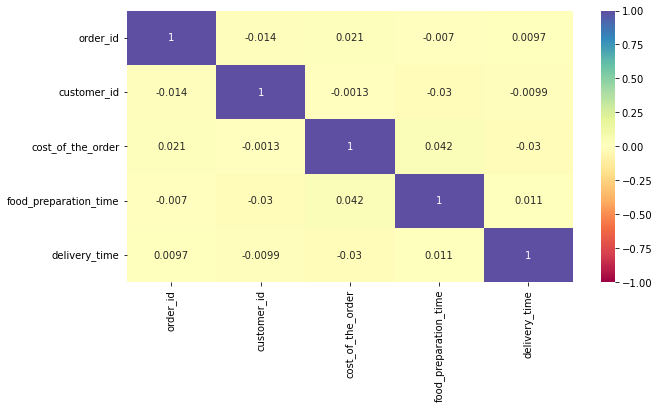

In [22]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

#### Observations: 
None of the numerical variables seem to have any strong correlation with each other. Let's examine the relationship between numerical and categorical variables.

<AxesSubplot:xlabel='day_of_the_week', ylabel='delivery_time'>

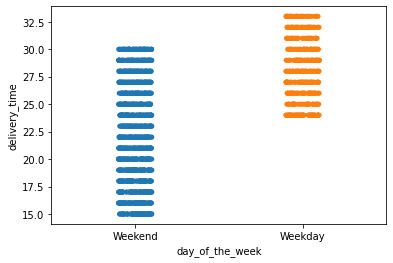

In [146]:
sns.stripplot(data=df,x='day_of_the_week',y='delivery_time',jitter=True)

<AxesSubplot:xlabel='day_of_the_week', ylabel='delivery_time'>

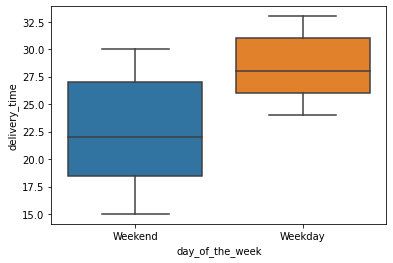

In [147]:
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time')

#### Observations: 
50% of the weekends orders take less than 22.5 minutes to be delivered while 50% of the weekday orders take less than 30 minutes to be delivered. On Weekdays the median delivery time is higher than on Weekends. The delivery time on the weekdays is significantly slower (with all of the delivery times on the weekdays being higher than the median of delivery time on the weekends). 

<AxesSubplot:xlabel='rating', ylabel='delivery_time'>

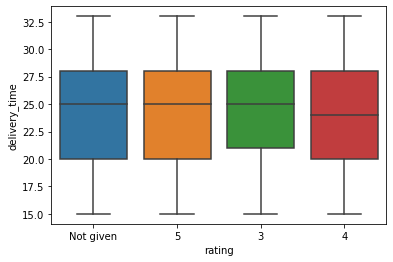

In [148]:
sns.boxplot(data=df, x='rating', y='delivery_time')

#### Observations: 
The median delivery time for orders with a rating of 4 are lower than the rest of the ratings.

<AxesSubplot:xlabel='rating', ylabel='count'>

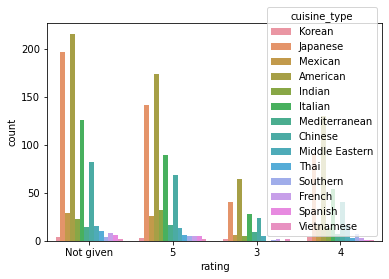

In [149]:
sns.countplot(data=df, x='rating', hue='cuisine_type')

#### Observations:
American, Japanese, Italian, and Chinese cuisines are rated the most throughout all ratings. However American cuisines receive the highest ratings out of all the other cuisines. Japanese cuisines are the second most highest rated cuisine then Italian, and then Chinese. 

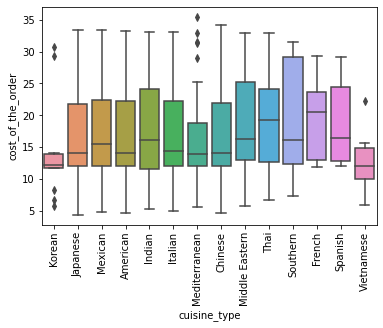

In [177]:
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order')
plt.xticks(rotation=90);

#### Observations:
Vietnamese and Korean cuisine have a median cost that is lower than all of the other cuisines. French cuisine on the other hand have a median cost that is higher than all the other cuisines. 

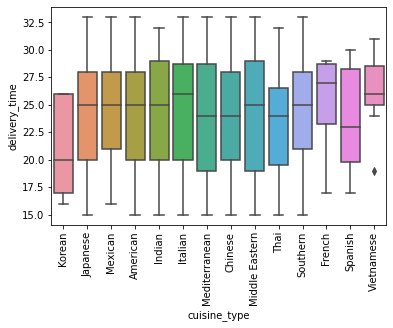

In [156]:
sns.boxplot(data=df, x='cuisine_type', y='delivery_time')
plt.xticks(rotation=90);

#### Observations:
The median delivery time for Korean cuisine is significantly lower than all the other cuisines meaning that the delivery time for Korean cuisine is faster compared to the other cuisines. The French cuisine on the other hand has the highest median delivery time meaning they are the slowest with delivering. 

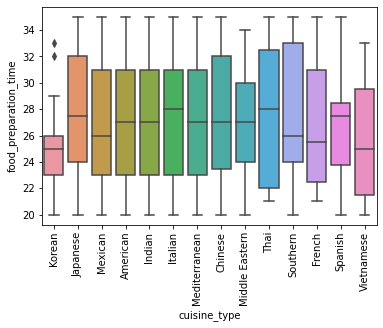

In [157]:
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time')
plt.xticks(rotation=90);

#### Observations:
Korean and Vietnamese cuisines have a median time of food preparation that is the lowest compared to all the other cuisines. Meanwhile Italian, Thai, and Spanish have a median time of food preparation that is the highest compared to the other cuisines. This means that based on the data Korean and Vietnamese cuisines are faster to prep while Italian, Thai, and Spanish cuisines take a longer time to prep their food. 

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. 

In [102]:
df_norating = df.copy() #first I made a copy of the data set in order to create a dataset that only contained restaurants that had ratings

In [116]:
df_norating.drop(df_norating[df_norating['rating'] == 'Not given'].index, inplace = True) #Then I dropped all the columns that were not given a rating
df_norating

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
2,1477070,66393,Cafe Habana,Mexican,12.230000,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200000,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.590000,Weekday,4,25,24,49
5,1477224,147468,Tamarind TriBeCa,Indian,25.220000,Weekday,3,20,24,44
7,1477859,89574,Barbounia,Mediterranean,5.970000,Weekday,3,33,30,63
...,...,...,...,...,...,...,...,...,...,...
1889,1478190,94152,RedFarm Broadway,Chinese,8.680000,Weekday,3,33,30,63
1890,1477316,164776,TAO,Japanese,15.670000,Weekend,5,20,22,42
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.310000,Weekend,5,31,17,48
1894,1477421,397537,The Smile,American,12.180000,Weekend,5,31,19,50


In [168]:
avg_rating = df_norating.groupby('restaurant_name')[['rating']].mean().reset_index() #Then I created a new table using the groupby function that contained the restaurant name and the mean rating of each restaurant 
avg_rating

,restaurant_name,rating
0,'wichcraft,5.000000
1,12 Chairs,22.500000
2,5 Napkin Burger,17.500000
3,67 Burger,5.000000
4,Amma,22.500000
...,...,...
151,Zero Otto Nove,4.000000
152,brgr,3.000000
153,da Umberto,5.000000
154,ilili Restaurant,349503495719.538452


In [128]:
avg_rating.rename(columns={'rating':'Avg_rating'},inplace=True) #then I changed the name of the column to avg_rating
avg_rating.head()

,restaurant_name,Avg_rating
0,'wichcraft,5.000000
1,12 Chairs,22.500000
2,5 Napkin Burger,17.500000
3,67 Burger,5.000000
4,Amma,22.500000


In [130]:
avg_rating[avg_rating['Avg_rating']>4] #then I found the ratings that were greater than 4

,restaurant_name,Avg_rating
0,'wichcraft,5.000000
1,12 Chairs,22.500000
2,5 Napkin Burger,17.500000
3,67 Burger,5.000000
4,Amma,22.500000
...,...,...
149,Yama 49,1388.750000
150,Yama Japanese Restaurant,6943191.750000
153,da Umberto,5.000000
154,ilili Restaurant,349503495719.538452


In [131]:
restaurant_count = df_norating.groupby(['restaurant_name'])['rating'].count().reset_index() #in order to find the rating count I created a new table with the groupby function that combined the restaurant name and the number of ratings they had. In order to find the number of ratings each restaurant had I used the count() function. 
restaurant_count 

,restaurant_name,rating
0,'wichcraft,1
1,12 Chairs,2
2,5 Napkin Burger,2
3,67 Burger,1
4,Amma,2
...,...,...
151,Zero Otto Nove,1
152,brgr,1
153,da Umberto,1
154,ilili Restaurant,13


In [132]:
restaurant_count.rename(columns={'rating':'Rating_counts'},inplace=True) #then i changed the column name to rating_counts
restaurant_count.head()

,restaurant_name,Rating_counts
0,'wichcraft,1
1,12 Chairs,2
2,5 Napkin Burger,2
3,67 Burger,1
4,Amma,2


In [133]:
restaurant_50 = restaurant_count[restaurant_count['Rating_counts']>50] #then I selected the restaurant names that had more than 50 ratings
restaurant_50

,restaurant_name,Rating_counts
16,Blue Ribbon Fried Chicken,64
17,Blue Ribbon Sushi,73
117,Shake Shack,133
132,The Meatball Shop,84


In [135]:
df_top= avg_rating.merge(restaurant_50, on = 'restaurant_name', how = 'inner') #then I merged the average rating table with the rating counts table 
df_top

,restaurant_name,Avg_rating,Rating_counts
0,Blue Ribbon Fried Chicken,55522741475711807919461057470141387359084904201...,64
1,Blue Ribbon Sushi,60897732127867884336881233990148016216967042749...,73
2,Shake Shack,41770183108611616557607093322651119261205301205...,133
3,The Meatball Shop,64946970887564690095046783185299118780529486559...,84


#### Observations:
Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop are elligible for a promotional offer from FoodHub with a rating count of more than 50 and the average rating greater than 4. 

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [58]:
df['cost_of_the_order'].unique() #first I selected each value from the cost_of_the_order column 

array([30.75, 12.08, 12.23, 29.2 , 11.59, 25.22,  6.07,  5.97, 16.44,
        7.18,  5.92,  8.1 , 24.3 , 11.3 , 12.13, 16.2 , 16.98, 33.03,
       14.12, 24.2 , 15.91, 29.1 ,  8.92, 15.86, 21.88, 14.02,  9.17,
       12.18, 31.33, 29.05,  8.39,  9.12, 15.47, 16.01, 29.83, 19.89,
       19.35, 33.22, 24.25, 22.75,  6.74, 13.78, 16.93, 29.39, 20.23,
       14.6 ,  6.79, 31.38,  8.34, 12.46, 14.55, 32.93,  8.  , 13.05,
        5.67, 29.29, 16.15, 13.34,  9.75,  6.69,  4.75, 12.56, 21.2 ,
       19.31, 16.3 , 25.27, 14.79,  5.72,  9.22, 16.39, 17.03, 21.83,
       31.29, 11.83, 22.26, 20.47, 15.81, 22.36,  8.68, 12.9 , 29.15,
        7.86, 16.1 , 12.95, 11.69, 12.32, 14.99, 10.38,  9.65,  5.77,
        9.56, 29.34, 11.16, 14.07, 22.8 , 15.23, 16.49,  8.83, 16.25,
       16.83, 10.24, 19.4 , 13.97, 13.  ,  8.49, 20.18, 19.59, 16.11,
       12.27, 13.39,  9.02, 15.33, 31.43, 29.35, 15.28,  9.6 ,  8.88,
       15.96,  8.05,  8.54,  7.23, 19.69,  9.27,  8.97, 11.64, 13.15,
        9.41,  9.07,

In [61]:
cost = [30.75, 12.08, 12.23, 29.2 , 11.59, 25.22,  6.07,  5.97, 16.44,
        7.18,  5.92,  8.1 , 24.3 , 11.3 , 12.13, 16.2 , 16.98, 33.03,
       14.12, 24.2 , 15.91, 29.1 ,  8.92, 15.86, 21.88, 14.02,  9.17,
       12.18, 31.33, 29.05,  8.39,  9.12, 15.47, 16.01, 29.83, 19.89,
       19.35, 33.22, 24.25, 22.75,  6.74, 13.78, 16.93, 29.39, 20.23,
       14.6 ,  6.79, 31.38,  8.34, 12.46, 14.55, 32.93,  8.  , 13.05,
        5.67, 29.29, 16.15, 13.34,  9.75,  6.69,  4.75, 12.56, 21.2 ,
       19.31, 16.3 , 25.27, 14.79,  5.72,  9.22, 16.39, 17.03, 21.83,
       31.29, 11.83, 22.26, 20.47, 15.81, 22.36,  8.68, 12.9 , 29.15,
        7.86, 16.1 , 12.95, 11.69, 12.32, 14.99, 10.38,  9.65,  5.77,
        9.56, 29.34, 11.16, 14.07, 22.8 , 15.23, 16.49,  8.83, 16.25,
       16.83, 10.24, 19.4 , 13.97, 13.  ,  8.49, 20.18, 19.59, 16.11,
       12.27, 13.39,  9.02, 15.33, 31.43, 29.35, 15.28,  9.6 ,  8.88,
       15.96,  8.05,  8.54,  7.23, 19.69,  9.27,  8.97, 11.64, 13.15,
        9.41,  9.07, 14.46,  6.7 , 19.45, 12.22, 29.25, 16.05, 17.08,
       32.98, 13.73, 14.31, 14.7 , 15.52,  6.11, 21.93, 15.76,  9.46,
       12.61, 22.85, 16.06, 21.39,  8.25, 14.94, 14.26, 21.34, 14.16,
        5.68, 15.57, 14.45,  8.15,  8.78,  8.59, 15.62,  5.87,  6.01,
        9.85,  6.84,  5.82,  7.96,  9.7 ,  4.85,  6.06, 12.66,  6.02,
        7.08, 12.37, 14.84, 22.31, 13.1 , 14.75, 24.35, 25.17,  9.26,
        9.55, 13.92,  4.66, 13.87,  7.61, 15.72,  8.35, 14.21, 14.65,
        4.71,  8.63, 13.68, 11.93, 35.41,  6.64, 10.72,  8.73, 16.78,
        5.58, 13.63, 29.54, 29.49, 15.04, 18.24,  4.47,  8.98, 15.71,
        8.93,  9.51,  9.61,  7.38, 13.19, 10.82,  6.26,  8.2 ,  7.33,
       12.71,  5.63, 17.07,  5.48, 22.12, 15.77,  6.45, 11.79, 11.98,
       20.32, 28.57, 22.07, 21.29, 14.41, 29.88,  4.8 , 10.14,  8.44,
       16.54,  7.71, 29.78, 31.86, 19.98, 12.42, 12.52, 15.38,  8.3 ,
       13.24,  8.01, 29.68,  9.32, 12.51,  5.34,  6.4 , 19.3 , 17.85,
       16.88, 13.77,  5.73, 11.84, 15.67, 13.58, 33.18,  6.55, 20.52,
       28.62, 15.18, 29.3 , 12.81, 29.44, 11.11, 14.5 , 22.02, 11.88,
       33.32, 18.43, 12.47, 20.13, 20.57, 15.09, 19.74, 18.04, 31.67,
        5.05,  7.03, 14.8 , 12.17,  7.28, 15.13,  7.81, 16.74,  9.31,
       21.25, 31.87, 19.02, 34.19,  5.53, 22.46, 29.73, 10.43, 19.5 ,
        4.9 , 15.37,  7.67,  7.91, 13.53, 33.37, 19.6 , 13.48, 20.71,
       20.61,  7.66, 10.86,  7.95, 20.86, 29.59] #then i created a list so that I would be able to run a for loop throughout the list

In [178]:
rev = 0 #first I set the variable rev to equal to 0 so that the total rev could be calculated
for i in cost: #this is my for loop in which each condition will be looped for every value in the cost list 
    if i > 20: #then i set my if condition because orders greater than 20 are to give the company 25% that is why (i*0.25)
        rev=(i*0.25)+rev #in the start of the loop rev = 0 but as the loop goes on the rev of the previous value will continue to be added up
    elif i < 20 and i > 5: #then i set my elif condition in which if i <20 and i>5 then the company will charge 15% that is why (i*0.15)
        rev=(i*0.15)+rev
        
print ("The revenue is", rev) #this will then after the loop is complete give me the total revenue 

The revenue is 901.2690000000007


#### Observations:
FoodHub's total revenus from surcharges alone is 901.27 dollars.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) 

In [24]:
sum_column = df['food_preparation_time'] + df['delivery_time'] #first I add the food prep time and delivery time column to create a total time column
df["total_time"] = sum_column
print(df)

      order_id  customer_id                        restaurant_name  \
0      1477147       337525                                Hangawi   
1      1477685       358141              Blue Ribbon Sushi Izakaya   
2      1477070        66393                            Cafe Habana   
3      1477334       106968              Blue Ribbon Fried Chicken   
4      1478249        76942                       Dirty Bird to Go   
...        ...          ...                                    ...   
1893   1476701       292602  Chipotle Mexican Grill $1.99 Delivery   
1894   1477421       397537                              The Smile   
1895   1477819        35309                      Blue Ribbon Sushi   
1896   1477513        64151                      Jack's Wife Freda   
1897   1478056       120353                      Blue Ribbon Sushi   

       cuisine_type  cost_of_the_order day_of_the_week     rating  \
0            Korean          30.750000         Weekend  Not given   
1          Japanese  

In [28]:
df.loc[df['total_time']>60].shape #then I locate the total time that is greater than 60 and then use the shape function to find how many rows of the data have a total time that is greater than 60 

(200, 10)

In [29]:
200/1898*100 #then I take that number and divide it with the total of orders in the data set multiplied by 100 to find the percentage of orders that take more than 60 minutes to be prepared and delivered.

10.537407797681771

#### Observations:
10 percent of orders take more than 60 minutes to get delivered from the time the order was placed. After adding up the two columns: food_preparation_time and deliver_time I found that 200 out of the 1898 orders took more than 60 minutes to get delivered from the time the order was placed.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? 

In [179]:
df.groupby('day_of_the_week')['delivery_time'].mean().reset_index #by using the groupby function the day of the week and the mean of the delivery time are combined

<bound method Series.reset_index of day_of_the_week
Weekday   28.340037
Weekend   22.470022
Name: delivery_time, dtype: float64>

#### Observations:
On Weekends the mean delivery time is faster than the mean delivery time on weekdays. Delivery time on weekdays takes longer than delivery times on the weekends.The mean weekend delivery time is 6 minutes faster than the mean delivery time on the weekdays. 

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.)

## Conclusions:
* American, Japanese, Italian, and Chinese are the most popular cuisine types among FoodHub customers.
* 50% of orders cost less than 15 dollars.
* Most of the orders in FoodHub fall in the  10− 20 dollar range.
* More than half of the orders are placed on Weekends. 
* FoodHub service is in higher demand on the Weekends not Weekdays. 
* A majority of the orders are not given a rating by each customer but in cases where a customer gives a rating higher ratings are given. 
* When a order was rated, most orders were given a rating of 5. 
* There are no ratings that are lower than a 3.
* 50% of orders took less than 27 minutes for their food to be prepped.
* 50% of orders have delivery times of less than 25 minutes.
* Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm are the top 5 restaurants in terms of the number of orders received.
* The American cuisine type is the most popular on weekends with 415 orders. Followed by the Japanese cuisine type with 335 orders.
* 29% of orders cost more than 20 dollars
* 71% of orders are less than 20 dollars
* The mean order delivery time is 24 minutes.
* None of the numerical variables seem to have any strong correlation with each other.
* On Weekdays the median delivery time is higher than on Weekends. The delivery time on the weekdays is significantly slower (with all of the delivery times on the weekdays being higher than the median of delivery time on the weekends).
* American, Japanese, Italian, and Chinese cuisines are rated the most throughout all ratings.
* American cuisines receive the highest ratings out of all the other cuisines.
* Vietnamese and Korean cuisine have a median cost that is lower than all of the other cuisines. 
* French cuisine on the other hand have a median cost that is higher than all the other cuisines.
* The delivery time for Korean cuisine is faster compared to the other cuisines.
* The French cuisine is the slowest with delivery time.
* Korean and Vietnamese cuisines are faster to prep while Italian, Thai, and Spanish cuisines take a longer time to prep their food.
* FoodHub's total revenus from surcharges alone is 901.27 dollars.
* 10 percent of orders take more than 60 minutes to get delivered from the time the order was placed.
* Delivery time on weekdays takes longer than delivery times on the weekends.

### Recommendations:

*  In order to receive the best feedback from your customers I would suggest requiring your customers to give a rating in order to complete their transaction that way next time there won't be any restaurants that don't have a rating.
* Because more than half of the orders are placed on Weekends I would recommend to hire more delivery workers on the weekends rather than on the weekdays. 
* Because American, Japanese, Italian, and Chinese are the most popular cuisine types among FoodHub customers. I would recommend adding more restaurants that fall under those cuisines because they are in such high demand. 
* If you want to gain more revenue from surcharges I suggest finding more French restaurants because French cuisine has a median cost that is higher than all the other cuisines.
* If you are looking to quicken your time from when a customer ordered I would look into adding more Korean and Vietnamese cuisines because they are faster to prep. I would avoid Italian, Thai, and Spanish cuisines because they take longer to prep their food. 
* Because American cuisines receive the highest ratings out of all the other cuisines I would suggest adding more American cuisines.
* Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm are your most favored restaurants by your customers so I suggest creating good relations with these businesses and working with them would be beneficial for your company. 

---